In [1]:
import pandas as pd
df = pd.read_excel("portabilidad.xlsx")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7095 entries, 0 to 7094
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Cedente             7095 non-null   object        
 1   Receptor            7095 non-null   object        
 2   Modalidad Cedente   7095 non-null   object        
 3   Modalidad Receptor  7095 non-null   object        
 4   Mes                 7095 non-null   datetime64[ns]
 5   Líneas              7095 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 332.7+ KB


In [3]:
#CONVERTIR A DATATIME
df ["fecha"]= pd.to_datetime(df['Mes'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7095 entries, 0 to 7094
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Cedente             7095 non-null   object        
 1   Receptor            7095 non-null   object        
 2   Modalidad Cedente   7095 non-null   object        
 3   Modalidad Receptor  7095 non-null   object        
 4   Mes                 7095 non-null   datetime64[ns]
 5   Líneas              7095 non-null   int64         
 6   fecha               7095 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 388.1+ KB


In [4]:
df

,Cedente,Receptor,Modalidad Cedente,Modalidad Receptor,Mes,Líneas,fecha
0,América Móvil Perú S.A.C.,Entel Perú S.A.,PREPAGO,PREPAGO,2014-07-01,112,2014-07-01
1,América Móvil Perú S.A.C.,Telefónica del Perú S.A.A.,PREPAGO,PREPAGO,2014-07-01,162,2014-07-01
2,Entel Perú S.A.,América Móvil Perú S.A.C.,PREPAGO,PREPAGO,2014-07-01,35,2014-07-01
3,Entel Perú S.A.,Telefónica del Perú S.A.A.,PREPAGO,PREPAGO,2014-07-01,18,2014-07-01
4,Telefónica del Perú S.A.A.,América Móvil Perú S.A.C.,PREPAGO,PREPAGO,2014-07-01,601,2014-07-01
...,...,...,...,...,...,...,...
7090,Telefónica del Perú S.A.A.,Viettel Perú S.A.C.,POSTPAGO,PREPAGO,2025-02-01,2128,2025-02-01
7091,Telefónica del Perú S.A.A.,Viettel Perú S.A.C.,PREPAGO,POSTPAGO,2025-02-01,4549,2025-02-01
7092,Telefónica del Perú S.A.A.,Viettel Perú S.A.C.,PREPAGO,PREPAGO,2025-02-01,11383,2025-02-01
7093,Flash Servicios Perú S.R.L.,Viettel Perú S.A.C.,PREPAGO,POSTPAGO,2025-02-01,11,2025-02-01


In [10]:
# Agrupar por mes
lineas_cedentes = (
    df
    .groupby(df['fecha'].dt.to_period('Q'))['Líneas']
    .sum()
    .to_timestamp()
    .reset_index()
    .rename(columns={'fecha': 'Fecha', 'Cedente': 'Cedente'})
)

lineas_cedentes.set_index('Fecha', inplace=True)

In [11]:
lineas_cedentes

,Líneas
Fecha,
2014-07-01,26043
2014-10-01,140804
2015-01-01,146387
2015-04-01,186312
2015-07-01,257481
2015-10-01,286547
2016-01-01,265897
2016-04-01,382827
2016-07-01,512131


In [12]:
lineas_cedentes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43 entries, 2014-07-01 to 2025-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Líneas  43 non-null     int64
dtypes: int64(1)
memory usage: 688.0 bytes


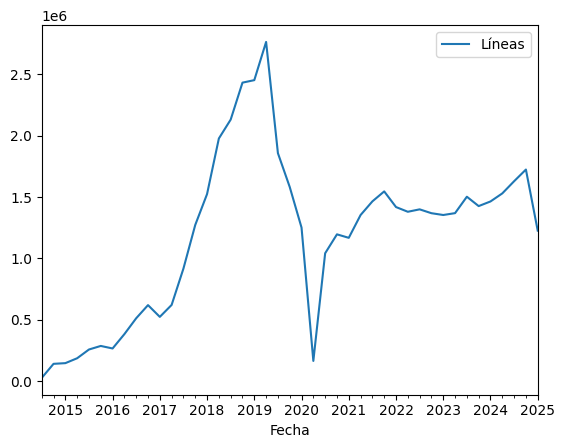

In [13]:
import matplotlib.pyplot as plt
lineas_cedentes.plot()
plt.show()

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpn9a8ano9/0ydc71uv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpn9a8ano9/_hnmm_k8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61217', 'data', 'file=/tmp/tmpn9a8ano9/0ydc71uv.json', 'init=/tmp/tmpn9a8ano9/_hnmm_k8.json', 'output', 'file=/tmp/tmpn9a8ano9/prophet_modeltgcd8459/prophet_model-20250426235223.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:52:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:52:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages

<Figure size 1200x500 with 0 Axes>

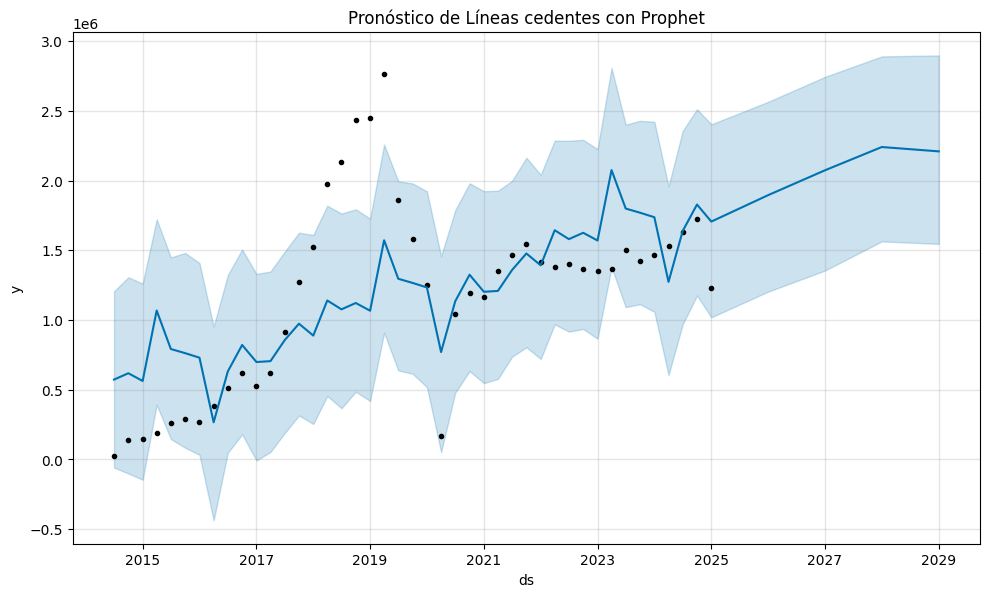

In [25]:
from prophet import Prophet
df_prophet = lineas_cedentes.reset_index().rename(columns={'Fecha': 'ds', 'Líneas': 'y'}) # Changed 'fecha' to 'Fecha'
modelo_prophet = Prophet()
modelo_prophet.fit(df_prophet)
pronostico = modelo_prophet.make_future_dataframe(periods=4, freq='ys')
pronostico = modelo_prophet.predict(pronostico)
plt.figure(figsize=(12, 5))
modelo_prophet.plot(pronostico)
plt.title("Pronóstico de Líneas cedentes con Prophet")
plt.grid(True)
plt.show()

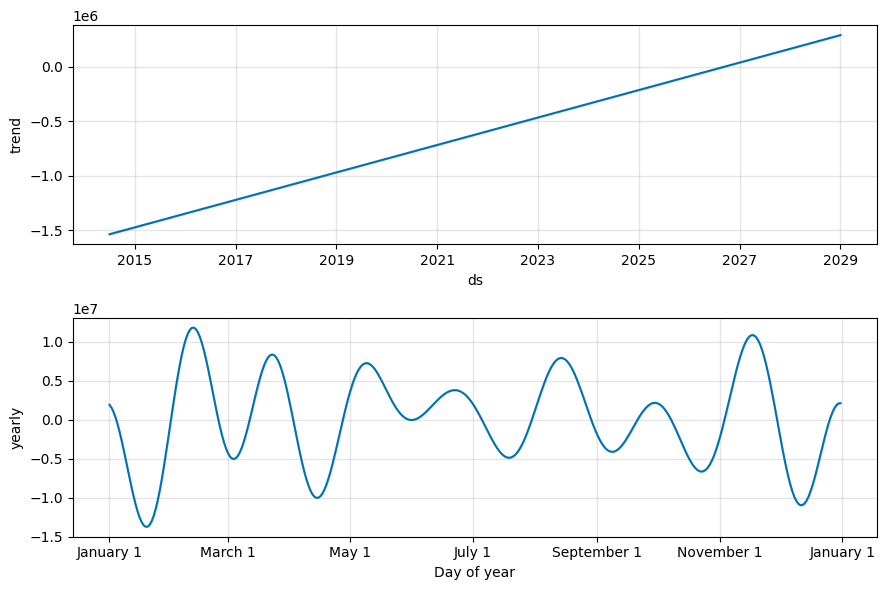

In [26]:
modelo_prophet.plot_components(pronostico)
plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


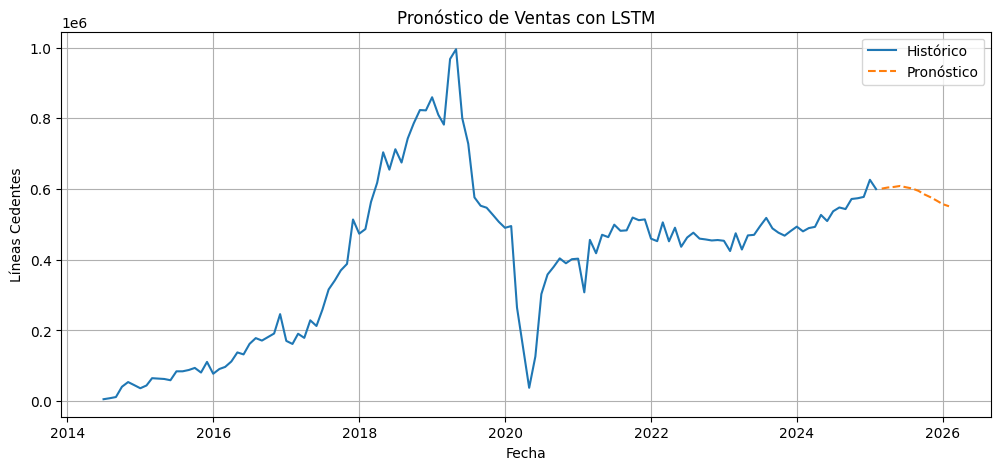

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


lineas_cedentes = (
    df.groupby(df['fecha'].dt.to_period('M'))['Líneas']
    .sum()
    .to_timestamp()
    .reset_index()
    .rename(columns={'fecha': 'Fecha', 'Líneas': 'Líneas'})
)

# Escalar los datos
scaler = MinMaxScaler()
ventas_scaled = scaler.fit_transform(lineas_cedentes[['Líneas']])

# Crear secuencias de entrada/salida
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i+n_steps])
        y.append(data[i+n_steps])
    return np.array(X), np.array(y)

n_steps = 12  # usar 12 meses previos para predecir el siguiente
X, y = create_sequences(ventas_scaled, n_steps)

# Reformatear para LSTM: [samples, timesteps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))

# === Paso 2: Construir la red LSTM ===
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Entrenar el modelo
model.fit(X, y, epochs=100, verbose=0)
x_input = ventas_scaled[-n_steps:].reshape((1, n_steps, 1))

# Predecir los siguientes 12 meses
predictions = []
for _ in range(12):
    yhat = model.predict(x_input, verbose=0)
    predictions.append(yhat[0][0])
    x_input = np.append(x_input[:, 1:, :], [[[yhat[0][0]]]], axis=1)

# Invertir la escala para volver a los valores originales
forecast = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))
last_date = lineas_cedentes['Fecha'].iloc[-1]
future_dates = pd.date_range(start=last_date + pd.offsets.MonthBegin(), periods=12, freq='MS')
forecast_df = pd.DataFrame({'Fecha': future_dates, 'Pronóstico': forecast.flatten()})

# Graficar
plt.figure(figsize=(12, 5))
plt.plot(lineas_cedentes['Fecha'], lineas_cedentes['Líneas'], label='Histórico')
plt.plot(forecast_df['Fecha'], forecast_df['Pronóstico'], label='Pronóstico', linestyle='--')
plt.title("Pronóstico de Ventas con LSTM")
plt.xlabel('Fecha')
plt.ylabel('Líneas Cedentes')
plt.legend()
plt.grid(True)
plt.show()
